# Predictive Sales Analysis: Valuing Capesize Ships (Compass Maritime Case)

## Compass Maritime Services – Regression-Based Valuation

**Objective**:

This notebook applies predictive sales analysis and multiple regression models to estimate the market value of a capesize bulk carrier ("Bet Performer").


**We use historical ship sale data to:**

- Identify key drivers of ship prices
- Build a regression-based pricing model
- Forecast a fair market value under different market conditions

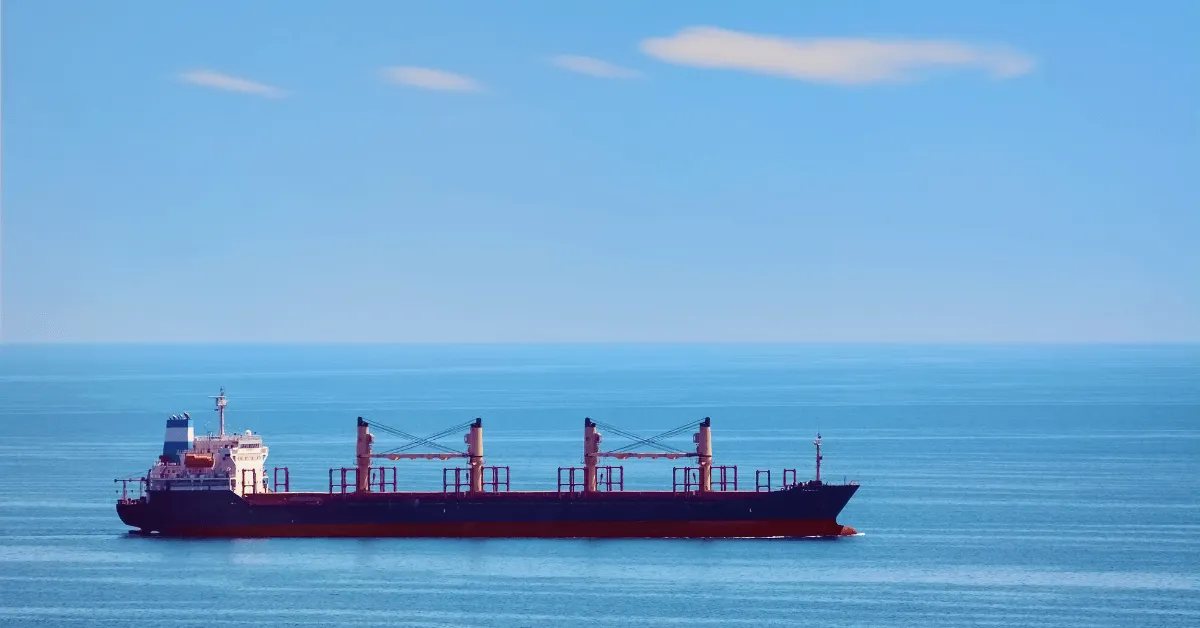

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [59]:
xl = pd.ExcelFile('/content/sales copy.xlsx')
xl.sheet_names


['data']

In [60]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

print(df.columns.tolist())


['Price', 'Year Built', 'Age', 'DWT', 'BDI']


In [61]:
df = pd.read_excel('/content/sales copy.xlsx')
df.head()

,Price,Year Built,Age,DWT,BDI
0,73.0,1999,8,170.2,4.647
1,45.0,1991,16,150.2,4.647
2,62.0,1995,12,151.1,4.647
3,60.0,1995,12,158.0,4.647
4,61.3,1993,14,174.7,4.647


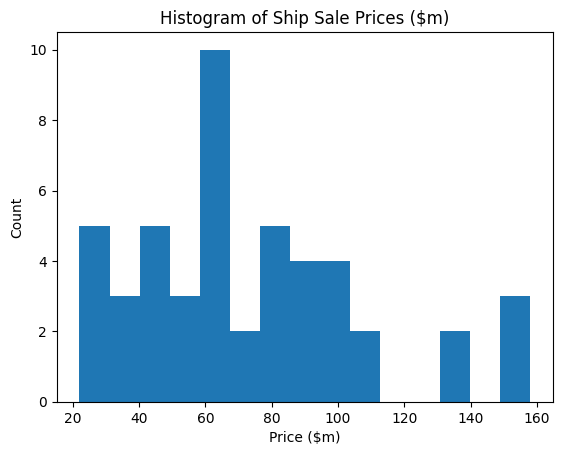

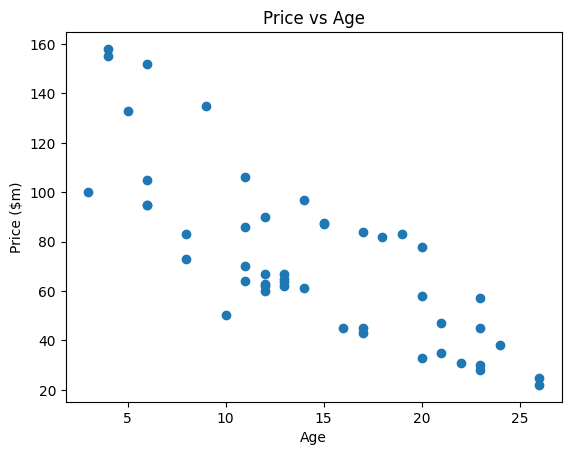

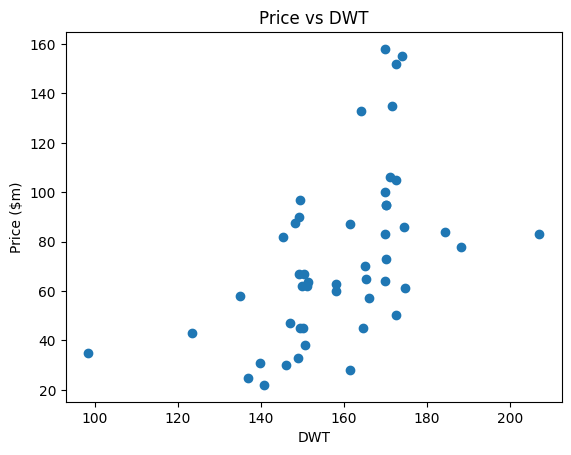

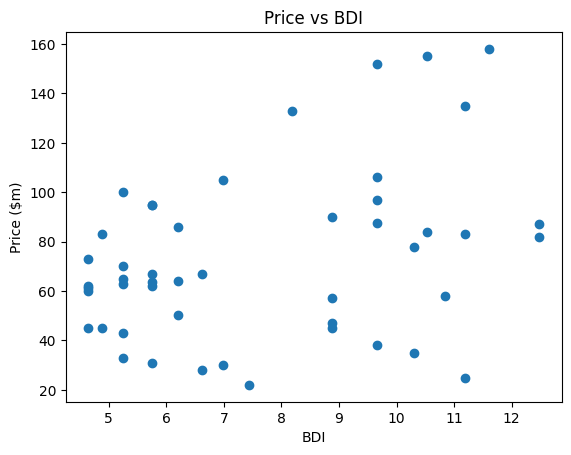

,Price,Age,DWT,BDI
Price,1.000000,-0.787491,0.514805,0.352348
Age,-0.787491,1.000000,-0.431264,0.217360
DWT,0.514805,-0.431264,1.000000,0.042766
BDI,0.352348,0.217360,0.042766,1.000000


In [62]:
# Histogram of prices
plt.figure()
plt.hist(df["Price"], bins=15)
plt.title("Histogram of Ship Sale Prices ($m)")
plt.xlabel("Price ($m)")
plt.ylabel("Count")
plt.show()

# Scatter plots
for x in ["Age", "DWT", "BDI"]:
    plt.figure()
    plt.scatter(df[x], df["Price"])
    plt.title(f"Price vs {x}")
    plt.xlabel(x)
    plt.ylabel("Price ($m)")
    plt.show()

# Correlation matrix
df[["Price", "Age", "DWT", "BDI"]].corr()

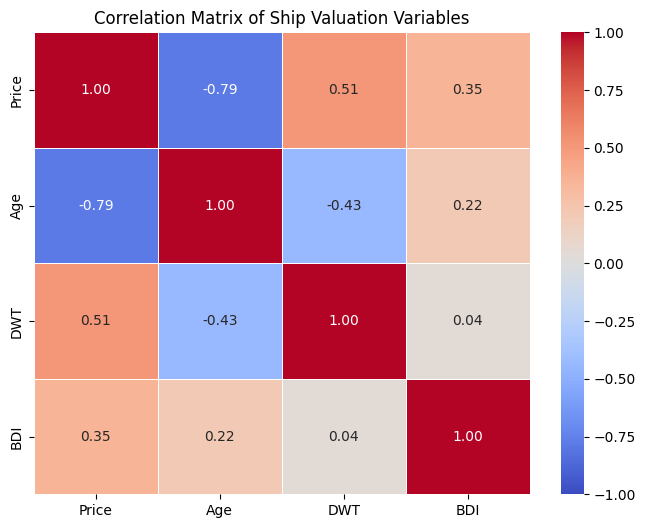

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_for_corr = ["Price", "Age", "DWT", "BDI"]
correlation_matrix = df[vars_for_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,          # show numbers
    fmt=".2f",           # 2 decimal places
    cmap="coolwarm",     # same red-blue style
    vmin=-1, vmax=1,     # fixed scale
    linewidths=0.5
)

plt.title("Correlation Matrix of Ship Valuation Variables")
plt.show()

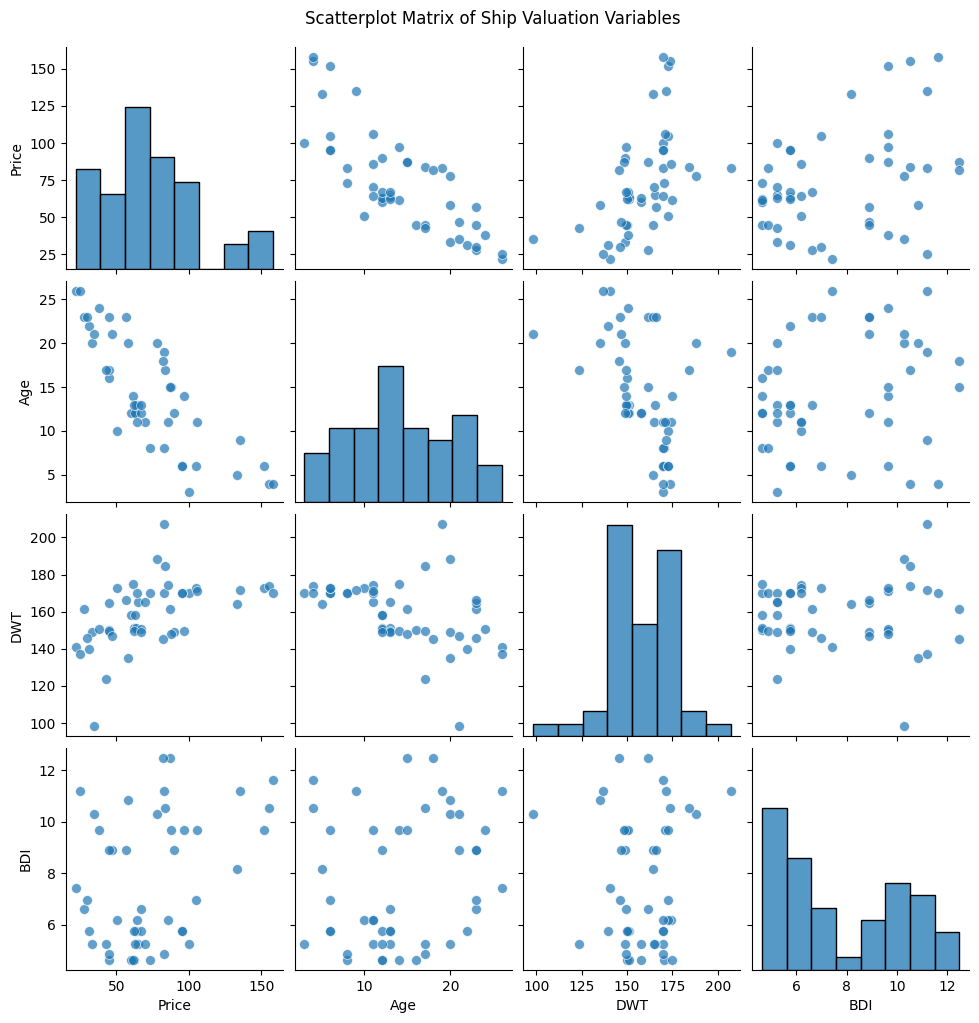

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select variables used in the analysis
data_selected = df[["Price", "Age", "DWT", "BDI"]]

# Create scatterplot matrix
sns.pairplot(
    data_selected,
    diag_kind="hist",
    plot_kws={"alpha": 0.7, "s": 50},
    diag_kws={"bins": 8}
)

plt.suptitle("Scatterplot Matrix of Ship Valuation Variables", y=1.02)
plt.show()

In [63]:
# Define predictor and target variable
X = df[['Age']]
y = df['Price']

In [64]:
import statsmodels.api as sm

# Simple regression: Price ~ Age
X = sm.add_constant(df["Age"], has_constant="add")
y = df["Price"]

model_simple = sm.OLS(y, X).fit()

print(model_simple.summary())

# Create new observation
new_age = pd.DataFrame({"Age": [11]})

# Add constant and align columns
new_age_const = sm.add_constant(new_age, has_constant="add")
new_age_const = new_age_const[model_simple.model.exog_names]

# Generate prediction with intervals
prediction = model_simple.get_prediction(new_age_const)
prediction_summary = prediction.summary_frame(alpha=0.05)

print(prediction_summary)

# Extract coefficients
intercept = model_simple.params["const"]
slope = model_simple.params["Age"]

# Print regression equation
print(f"Estimated Regression Equation:")
print(f"Price = {intercept:.2f} + ({slope:.2f} × Age)")



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     75.10
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           3.15e-11
Time:                        22:47:46   Log-Likelihood:                -213.49
No. Observations:                  48   AIC:                             431.0
Df Residuals:                      46   BIC:                             434.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.1295      7.583     17.556      0.0

In [65]:
import statsmodels.api as sm

# Define predictors and response
X = df[["Age", "DWT", "BDI"]]
y = df["Price"]

# Add intercept (constant) - force it to be added
X_const = sm.add_constant(X, has_constant="add")

# Fit model
model_multi = sm.OLS(y, X_const).fit()

# Model summary
print(model_multi.summary())

# Predic the Price
new_ship = pd.DataFrame({
    "Age": [11],
    "DWT": [172.0],
    "BDI": [12.479]
})

new_ship_const = sm.add_constant(new_ship, has_constant="add")
new_ship_const = new_ship_const[model_multi.model.exog_names]

pred = model_multi.get_prediction(new_ship_const).summary_frame(alpha=0.05)
print(pred)



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           3.39e-24
Time:                        22:47:46   Log-Likelihood:                -175.97
No. Observations:                  48   AIC:                             359.9
Df Residuals:                      44   BIC:                             367.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2255     16.383      2.699      0.0

In [66]:
import statsmodels.api as sm

# Define predictors and response
X = df[["Age", "DWT", "BDI"]]
y = df["Price"]

# Add intercept (constant) - force it to be added
X_const = sm.add_constant(X, has_constant="add")

# Fit model
model_multi = sm.OLS(y, X_const).fit()

# Model summary
print(model_multi.summary())

# Predic the Price
new_ship = pd.DataFrame({
    "Age": [6],
    "DWT": [172.0],
    "BDI": [12.479]
})

new_ship_const = sm.add_constant(new_ship, has_constant="add")
new_ship_const = new_ship_const[model_multi.model.exog_names]

pred = model_multi.get_prediction(new_ship_const).summary_frame(alpha=0.05)
print(pred)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           3.39e-24
Time:                        22:47:46   Log-Likelihood:                -175.97
No. Observations:                  48   AIC:                             359.9
Df Residuals:                      44   BIC:                             367.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2255     16.383      2.699      0.0

In [67]:
import statsmodels.api as sm

# Define predictors and response
X = df[["Age", "DWT", "BDI"]]
y = df["Price"]

# Add intercept (constant) - force it to be added
X_const = sm.add_constant(X, has_constant="add")

# Fit model
model_multi = sm.OLS(y, X_const).fit()

# Model summary
print(model_multi.summary())

# Predic the Price
new_ship = pd.DataFrame({
    "Age": [11],
    "DWT": [172.0],
    "BDI": [11.5]
})

new_ship_const = sm.add_constant(new_ship, has_constant="add")
new_ship_const = new_ship_const[model_multi.model.exog_names]

pred = model_multi.get_prediction(new_ship_const).summary_frame(alpha=0.05)
print(pred)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           3.39e-24
Time:                        22:47:46   Log-Likelihood:                -175.97
No. Observations:                  48   AIC:                             359.9
Df Residuals:                      44   BIC:                             367.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2255     16.383      2.699      0.0